Para esse exercício de classificação usaremos o dataset Shows disponível em: 
https://www.kaggle.com/code/mruanova/decision-tree-for-comedy-shows-w3schools/data

In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
df = pd.read_csv('/Users/iaquine/Documents/GitHub/Mineracao-de-dados/Data/shows.csv')
df.head(10)

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [36]:
df.dtypes

Age             int64
Experience      int64
Rank            int64
Nationality    object
Go             object
dtype: object

Para usar Árvores de Decisão, todos os dados devem ser numéricos. Vamos transformar os campos de texto em categorias numéricas usando a função **map()**.

In [37]:
df['Nationality'].value_counts()

UK     5
USA    4
N      4
Name: Nationality, dtype: int64

In [38]:
df['Nationality'] = df['Nationality'].map({'UK':0, 'USA':1, 'N':2})
df['Nationality'].value_counts()

0    5
1    4
2    4
Name: Nationality, dtype: int64

In [39]:
df['Go'].value_counts()

YES    7
NO     6
Name: Go, dtype: int64

In [40]:
df['Go'] = df['Go'].map({'YES':1, 'NO':0})
df['Go'].value_counts()

1    7
0    6
Name: Go, dtype: int64

In [41]:
df.head(10)

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1
5,44,14,5,0,0
6,66,3,7,2,1
7,35,14,9,0,1
8,52,13,7,2,1
9,35,5,9,2,1


In [44]:
#separando o dataset
atributos_nomes = ['Age','Experience','Rank','Nationality']
atributos = df[atributos_nomes]
classes = df['Go']

In [47]:
#construindo o modelo
arvore = DecisionTreeClassifier()
arvore = arvore.fit(atributos, classes)

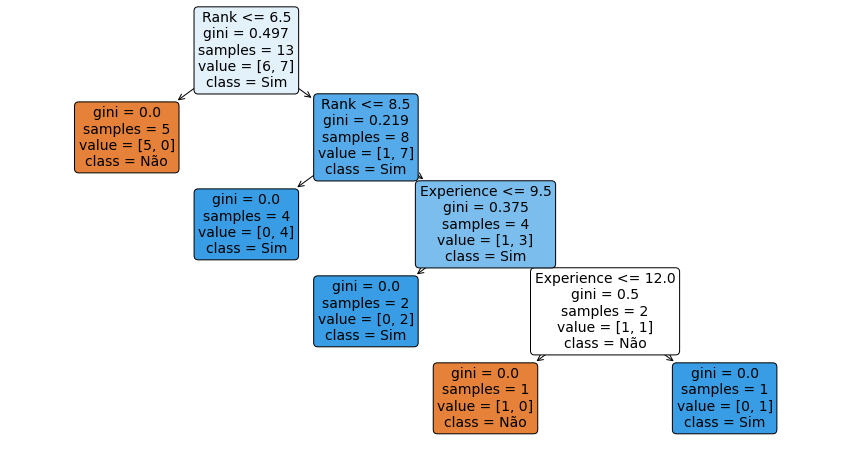

In [48]:
#visualizando a arvore que foi gerada
plt.figure(figsize=(15,8))
plot_tree(arvore,
          filled=True,
          rounded=True,
          class_names=['Não', 'Sim'],
          feature_names=atributos_nomes)
plt.show()

A árvore nos mostra como, a partir dos dados de treinamento de **comediantes**, as decisões serão tomadas.
Em cada nó, vemos as seguintes informações:
* O nome do atributo e o seu valor para verdadeiro ou falso
* gini: é o método usado para dividir as amostras. O valor varia entre 0.0 (todas as amostras com o mesmo resultado, então não há mais divisão) e 0.5 (o máximo de divisão, feita no meio da amostra).
* samples: é o número de amostras que atingiu aquele nó
* value: quantos objetos vão para os próximos ramos da árvore. Por exemplo, no nó raiz, 6 amostras vão para **não** e 7 vão para **sim** (gini = 0.497)

O nó da raiz também nos mostra o atributo mais importante para a classificação, nesse caso é o atributo **Rank**, ou nota do comediante. Quando esse valor é abaixo de 6,5, a classificação será **não**. A análise segue por outros atributos até atingir os nós folha.

In [49]:
#Com o modelo construido vamos testar novos valores
#Para: Age = 50, Experience = 10,Rank = 7,Nationality = 1
print(arvore.predict([[50,10,7,1]]))

[1]


In [50]:
#Para: Age = 50, Experience = 10,Rank = 4,Nationality = 1
print(arvore.predict([[50,10,4,1]]))

[0]
